In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('E:/casadje/GitHub/mekong_usecase/docs/notebooks/')
from pathlib import Path

from lisflood_read_plot import *

In [2]:
PATH = Path('Z:/nahaUsers/casadje/LISFLOOD/Guadiana')

In [13]:
res_ids = [141, 999]

## Burek reservoir

In [74]:
path_burek = PATH / 'out' / 'Burek'
settings_burek = PATH / 'settings_longterm_run.xml'

### Attributes

In [68]:
attrs_burek = pd.DataFrame(dtype=float)
for txt in (PATH / 'tables').glob('r*lim.txt'):
    serie = pd.read_csv(txt, sep='\t', index_col=0, header=None).squeeze()
    serie.name = txt.stem.strip('r')
    attrs_burek = pd.concat((attrs_burek, serie.loc[res_ids]), axis=1)
attrs_burek.index.name = 'ID'

### Time series
#### Reservoirs

In [75]:
# read results
aux = {}
for tss in (path_burek).glob('*res*.tss'):
    var = tss.stem.replace('res', '')
    df = read_tss(tss=tss, xml=settings_burek)
    df.columns = df.columns.astype(int)
    aux[var] = df[res_ids]

# reorganize by reservoir
map_vars = {'qin': 'inflow', 'qout': 'outflow', 'fill': 'filling'}
results_burek = {ID: pd.DataFrame({map_vars[var]: df[ID] for var, df in aux.items()}) for ID in res_ids}

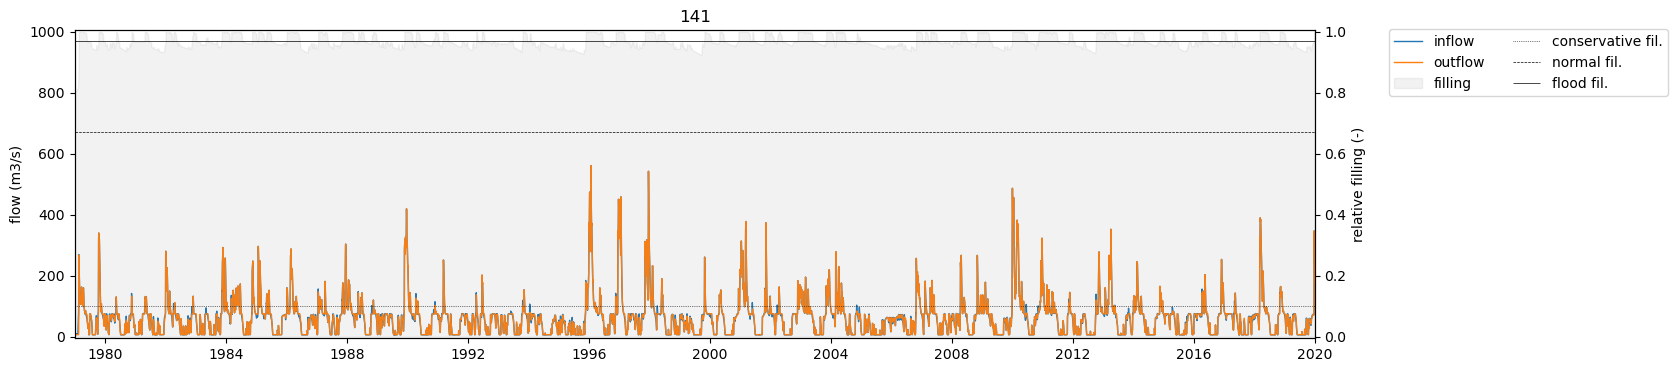

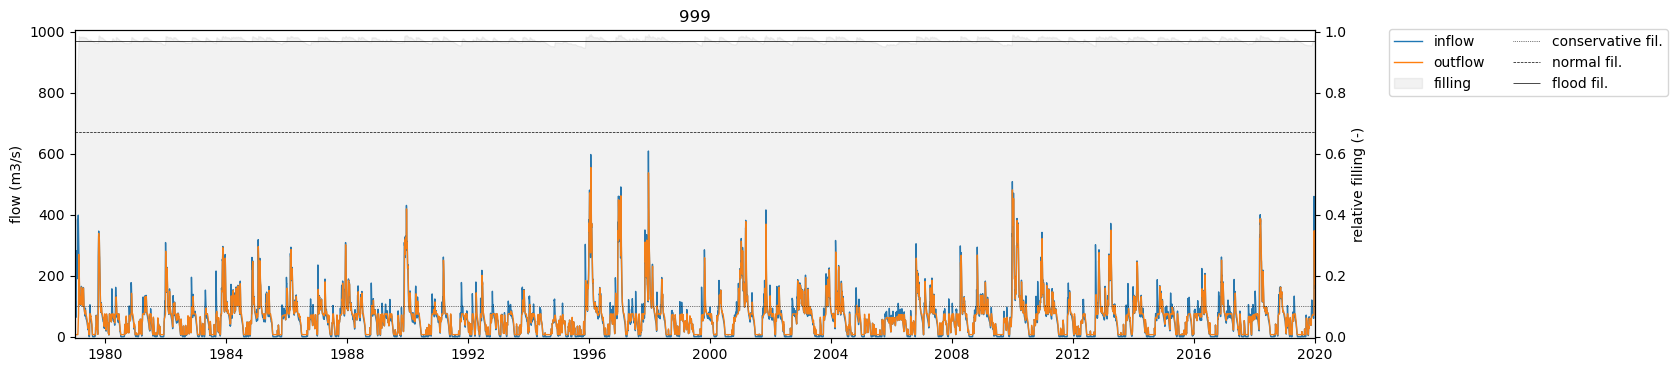

In [76]:
# visualise results
for ID, df in results_burek.items():
    plot_reservoir(df, *attrs_burek.loc[ID, ['clim', 'nlim', 'flim']], title=ID, ylim=(-5, 1005))

#### Streamflow

In [ ]:
dis = read_tss()

In [79]:
dis_burek = read_tss(path_burek / 'dis.tss', xml=settings_burek)

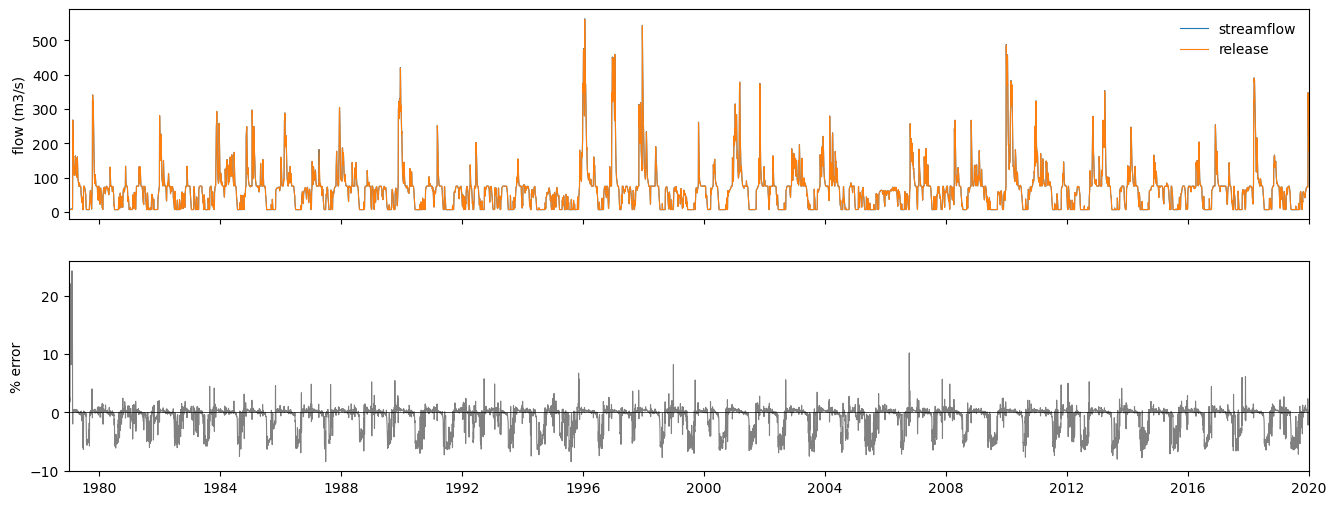

In [88]:
streamflow = dis_burek
release =results_burek[141].outflow

fig, ax = plt.subplots(nrows=2, figsize=(16, 6), sharex=True)
lw = .8
ax[0].plot(streamflow, lw=lw, label='streamflow')
ax[0].plot(release, lw=lw, label='release')
ax[0].set(xlim=(dis_burek.index.min(), dis_burek.index.max()),
        ylabel='flow (m3/s)')
ax[0].legend(frameon=False)

ax[1].plot((streamflow - release) / release * 100, lw=lw, c='gray')
ax[1].axhline(0, c='k', lw=.5)
ax[1].set(ylabel='% error');

## Hanazaki

In [102]:
path_hnzk = PATH / 'out' / 'Hanazaki'
settings_hnzk = PATH / 'hanazaki_run.xml'

#### Attributes

In [103]:
attrs_hnzk = pd.DataFrame(dtype=float)
for txt in (PATH / 'tables').glob('res_*_limit.txt'):
    serie = pd.read_csv(txt, sep='\t', index_col=0, header=None).squeeze()
    serie.name = txt.stem.strip('res_')
    attrs_hnzk = pd.concat((attrs_hnzk, serie.loc[res_ids]), axis=1)
attrs_hnzk.index.name = 'ID'
attrs_hnzk['emergency_limit'] = 0.8 + 0.2 * attrs_hnzk.flood_limit
attrs_hnzk['conservative_limit'] = 0.5 * attrs_hnzk.flood_limit

#### Time series

In [104]:
# read results
aux = {}
for tss in (path_hnzk).glob('res*.tss'):
    var = tss.stem.split('_')[-1]
    df = read_tss(tss=tss, xml=PATH / 'hanazaki_run.xml')#[res_ids]
    df.columns = df.columns.astype(int)
    aux[var] = df[res_ids]

# reorganize by reservoir
map_vars = {'inflow': 'inflow', 'outflow': 'outflow', 'fill': 'filling'}
results_hnzk = {ID: pd.DataFrame({map_vars[var]: df[ID] for var, df in aux.items()}) for ID in res_ids}

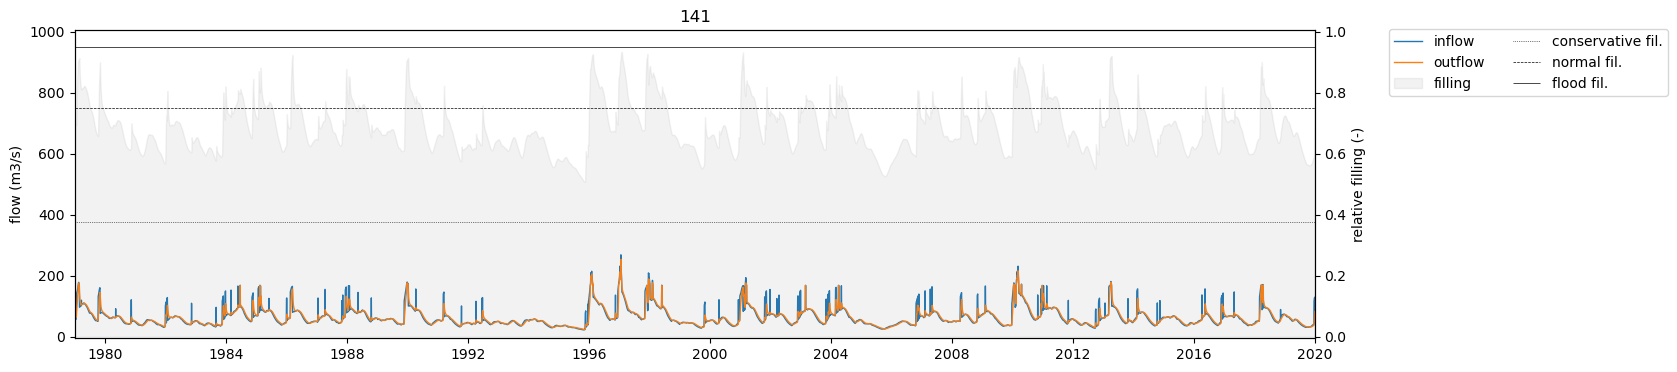

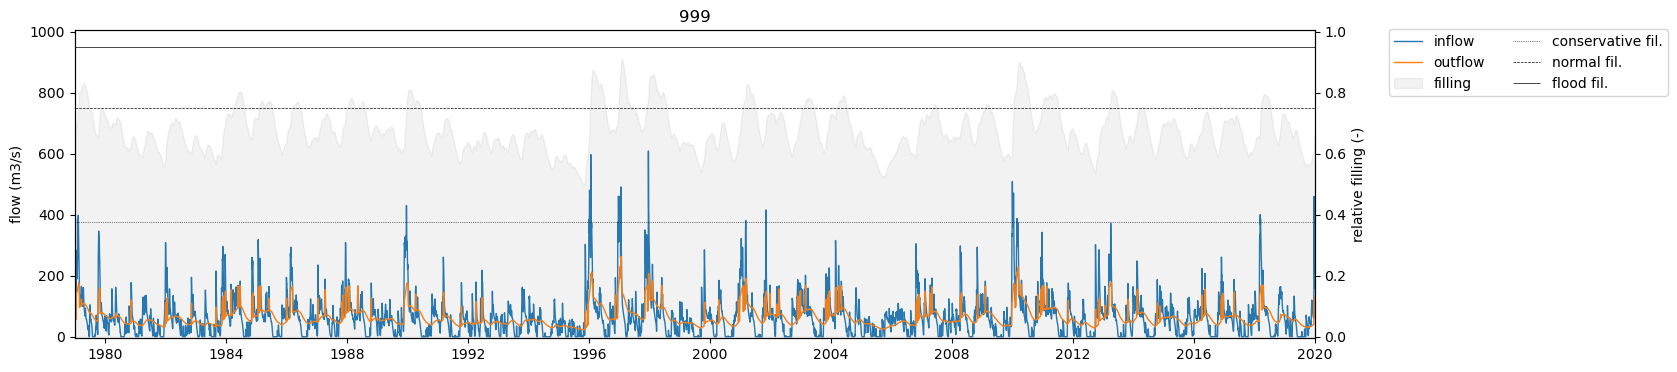

In [106]:
# visualise results
for ID, df in results_hnzk.items():
    plot_reservoir(
        df,
        *attrs_hnzk.loc[ID, ['conservative_limit', 'flood_limit', 'emergency_limit']],
        title=ID,
        ylim=(-5, 1005)
    )

#### Streamflow

In [112]:
dis_hnzk = read_tss(path_hnzk / 'dis.tss', xml=settings_hnzk)

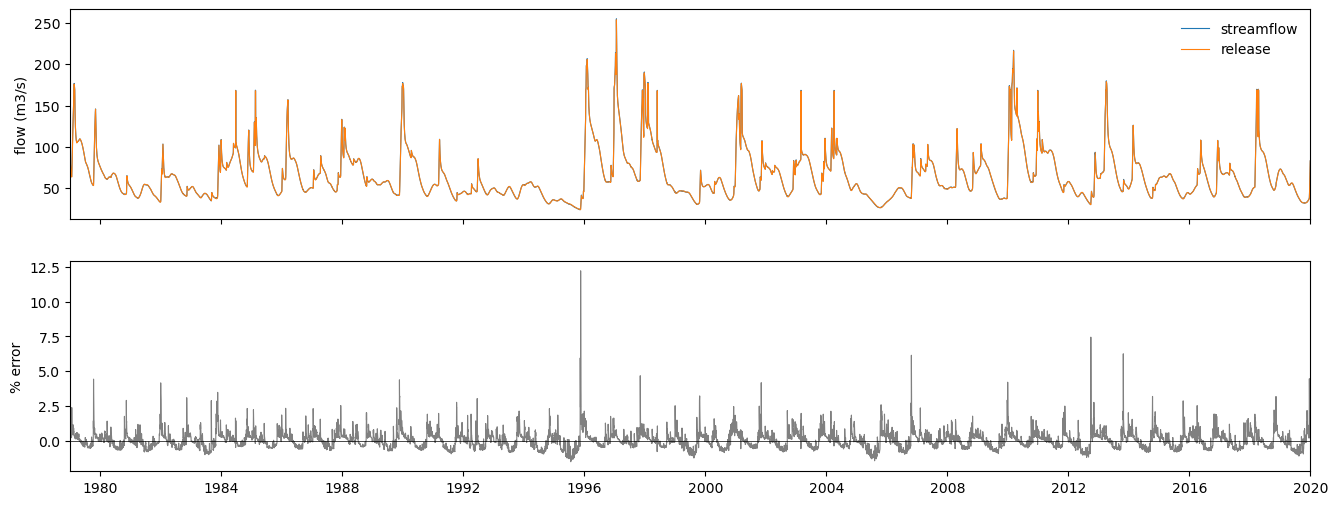

In [113]:
streamflow = dis_hnzk
release =results_hnzk[141].outflow

fig, ax = plt.subplots(nrows=2, figsize=(16, 6), sharex=True)
lw = .8
ax[0].plot(streamflow, lw=lw, label='streamflow')
ax[0].plot(release, lw=lw, label='release')
ax[0].set(xlim=(dis_burek.index.min(), dis_burek.index.max()),
        ylabel='flow (m3/s)')
ax[0].legend(frameon=False)

ax[1].plot((streamflow - release) / release * 100, lw=lw, c='gray')
ax[1].axhline(0, c='k', lw=.5)
ax[1].set(ylabel='% error');

In [41]:
dis = read_tss(PATH / 'out' / 'hanazaki' / 'dis.tss', xml=PATH / 'hanazaki_run.xml')

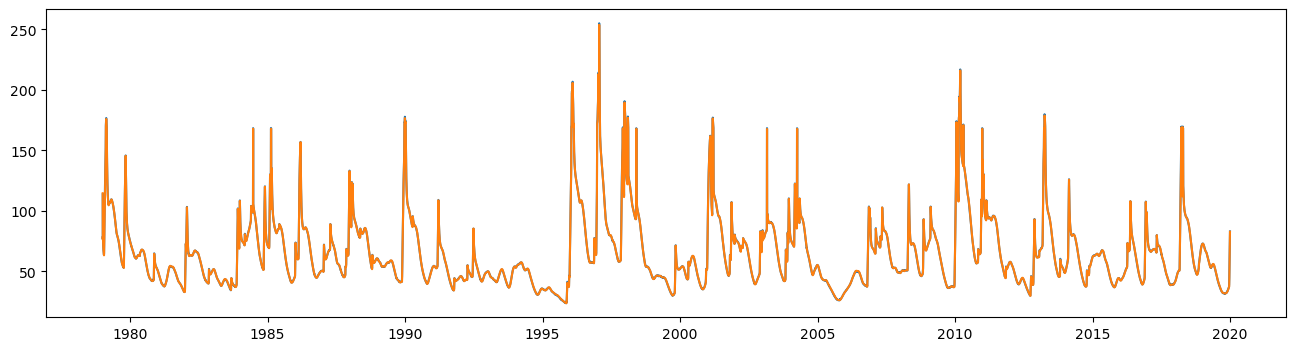

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(dis)
ax.plot(results_hanazaki[141].outflow);

In [48]:
np.isclose(dis, results_hanazaki[141].outflow)

array([False, False, False, ..., False, False, False])